In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # show all outputs in the same cell

np.set_printoptions(precision=4)# show only four decimal digits

In [2]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [3]:
import plotly.graph_objects as go

In [4]:
movies=pd.read_csv(r"C:\Users\Neha Thakar\Desktop\Spring Term\Unstructured Data Modeling\Project\test_movies_single.csv")

# Exploring the Data

In [5]:
movies.head(10)
movies.info()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000355,1,Fire!,\N,\N,original,\N,1,tt0000355,short,Fire!,Fire!,0,1901,\N,5,"Drama,Short",6.1,509
1,tt0003760,9,Caught in the Rain,\N,\N,original,\N,1,tt0003760,short,Caught in the Rain,Caught in the Rain,0,1914,\N,16,"Comedy,Short",5.7,751
2,tt0004101,6,His New Profession,\N,\N,original,\N,1,tt0004101,short,His New Profession,His New Profession,0,1914,\N,16,"Comedy,Short",6.0,1018
3,tt0008519,3,A Romance of the Redwoods,\N,\N,original,\N,1,tt0008519,movie,A Romance of the Redwoods,A Romance of the Redwoods,0,1917,\N,70,"Adventure,Comedy,Drama",5.7,712
4,tt0008634,4,Straight Shooting,\N,\N,original,\N,1,tt0008634,movie,Straight Shooting,Straight Shooting,0,1917,\N,57,Western,6.2,335
5,tt0008663,1,Terje Vigen,\N,\N,original,\N,1,tt0008663,movie,A Man There Was,Terje Vigen,0,1917,\N,48,"Drama,War",7.4,1384
6,tt0009086,3,The Forbidden City,\N,\N,original,\N,1,tt0009086,movie,The Forbidden City,The Forbidden City,0,1918,\N,62,"Drama,Romance",5.4,270
7,tt0009932,1,"Billy Blazes, Esq.",\N,\N,original,\N,1,tt0009932,short,"Billy Blazes, Esq.","Billy Blazes, Esq.",0,1919,\N,12,"Comedy,Short,Western",6.1,699
8,tt0011909,7,The Affairs of Anatol,\N,\N,original,\N,1,tt0011909,movie,The Affairs of Anatol,The Affairs of Anatol,0,1921,\N,117,"Comedy,Drama",6.6,1191
9,tt0012642,7,A Sailor-Made Man,\N,\N,original,\N,1,tt0012642,movie,A Sailor-Made Man,A Sailor-Made Man,0,1921,\N,47,Comedy,7.0,901


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1539 entries, 0 to 1538
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   titleId          1539 non-null   object 
 1   ordering         1539 non-null   int64  
 2   title            1539 non-null   object 
 3   region           1539 non-null   object 
 4   language         1539 non-null   object 
 5   types            1539 non-null   object 
 6   attributes       1539 non-null   object 
 7   isOriginalTitle  1539 non-null   int64  
 8   tconst           1539 non-null   object 
 9   titleType        1539 non-null   object 
 10  primaryTitle     1539 non-null   object 
 11  originalTitle    1539 non-null   object 
 12  isAdult          1539 non-null   int64  
 13  startYear        1539 non-null   int64  
 14  endYear          1539 non-null   object 
 15  runtimeMinutes   1539 non-null   object 
 16  genres           1539 non-null   object 
 17  averageRating 

In [6]:
movies.region.unique()
movies.language.unique()
movies.attributes.unique()
movies.startYear.unique()
movies.types.unique()
movies.titleType.unique()
movies.averageRating.unique()
movies.genres.unique()

array(['\\N', 'US'], dtype=object)

array(['\\N', 'en'], dtype=object)

array(['\\N'], dtype=object)

array([1901, 1914, 1917, 1918, 1919, 1921, 1923, 1924, 1926, 1927, 1928,
       1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939,
       1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950,
       1951, 1952, 1953, 1954, 1956, 1958, 1957, 1959, 1960, 1961, 1962,
       1963, 1964, 1965, 1966, 1968, 1967, 1969, 1970, 1972, 1971, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1989, 1987, 1988, 1993, 1994, 1992, 1995, 1997, 1998,
       1999, 1996, 1990, 2000, 1904, 1991, 1898, 2001, 1894, 2002, 2004,
       2003, 2007, 2005, 2006, 2019, 2012, 2008, 2017, 2011, 2009, 2013,
       2010, 2015, 1897, 2018, 2014, 2016], dtype=int64)

array(['original'], dtype=object)

array(['short', 'movie', 'tvMovie', 'tvSeries', 'tvEpisode',
       'tvMiniSeries', 'video', 'tvShort', 'tvSpecial', 'videoGame'],
      dtype=object)

array([ 6.1,  5.7,  6. ,  6.2,  7.4,  5.4,  6.6,  7. ,  6.9,  7.2,  6.5,
        8.1,  5.2,  6.7,  7.1,  6.8,  5.8,  7.5,  7.3,  4. ,  7.8,  7.7,
        7.9,  6.4,  8. ,  5. ,  6.3,  5.3,  7.6,  5.9,  2.1,  5.6,  3.2,
        4.9,  4.1,  2.7,  8.8,  8.2,  3.5,  5.1,  3.6,  5.5,  3.8,  4.7,
        4.6,  1.2,  4.3,  4.8,  9.3,  3.7,  4.2,  2.6,  8.7,  2.8,  2.9,
        2.2,  4.5,  8.4,  3.9,  4.4,  1.9,  8.5,  8.3,  8.6,  3.4,  8.9,
        2. ,  1.4,  2.3,  3. ,  2.4,  9. , 10. ,  9.4,  3.1,  9.6,  2.5,
        3.3,  9.1,  1.5,  9.5,  9.2])

array(['Drama,Short', 'Comedy,Short', 'Adventure,Comedy,Drama', 'Western',
       'Drama,War', 'Drama,Romance', 'Comedy,Short,Western',
       'Comedy,Drama', 'Comedy', 'Adventure,Comedy,Family',
       'Adventure,Drama,Mystery', 'Biography,Drama,History',
       'Drama,Romance,War', 'Adventure,Drama,Romance', 'Drama',
       'Drama,Mystery,Thriller', 'Comedy,Fantasy,Musical',
       'Comedy,Family,Short', 'Animation,Comedy,Family', 'Comedy,Mystery',
       'Comedy,Horror,Thriller', 'Mystery,Thriller',
       'Crime,Drama,Film-Noir', 'Crime,Mystery,Romance',
       'Action,Adventure,Drama', 'Comedy,Romance', 'Action,Comedy,Drama',
       'Horror,Romance,Sci-Fi', 'Crime,Drama', 'Comedy,Short,War',
       'Crime,Drama,Romance', 'Adventure,Romance', 'Comedy,Crime,Mystery',
       'Comedy,Drama,Family', 'Comedy,War', 'Action,Adventure,Comedy',
       'Adventure,History', 'Comedy,Musical', 'Crime,Drama,Mystery',
       'Comedy,Horror', 'Comedy,Musical,Romance', 'Drama,Thriller',
       'Act

In [7]:
movies.drop(['attributes'],axis=1)

,titleId,ordering,title,region,language,types,isOriginalTitle,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000355,1,Fire!,\N,\N,original,1,tt0000355,short,Fire!,Fire!,0,1901,\N,5,"Drama,Short",6.1,509
1,tt0003760,9,Caught in the Rain,\N,\N,original,1,tt0003760,short,Caught in the Rain,Caught in the Rain,0,1914,\N,16,"Comedy,Short",5.7,751
2,tt0004101,6,His New Profession,\N,\N,original,1,tt0004101,short,His New Profession,His New Profession,0,1914,\N,16,"Comedy,Short",6.0,1018
3,tt0008519,3,A Romance of the Redwoods,\N,\N,original,1,tt0008519,movie,A Romance of the Redwoods,A Romance of the Redwoods,0,1917,\N,70,"Adventure,Comedy,Drama",5.7,712
4,tt0008634,4,Straight Shooting,\N,\N,original,1,tt0008634,movie,Straight Shooting,Straight Shooting,0,1917,\N,57,Western,6.2,335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1534,tt9425568,1,Kung Fury: Street Rage,\N,\N,original,1,tt9425568,videoGame,Kung Fury: Street Rage,Kung Fury: Street Rage,0,2015,\N,\N,"Action,Sci-Fi",7.7,280
1535,tt9432978,2,Kota Factory,\N,\N,original,1,tt9432978,tvSeries,Kota Factory,Kota Factory,0,2019,\N,45,"Comedy,Drama",9.2,15340
1536,tt9730966,2,Apex Legends,\N,\N,original,1,tt9730966,videoGame,Apex Legends,Apex Legends,0,2019,\N,\N,"Action,Sci-Fi",7.3,871
1537,tt9747392,1,Flip That Romance,\N,\N,original,1,tt9747392,tvMovie,Flip That Romance,Flip That Romance,0,2019,\N,90,Romance,6.4,639


In [8]:
movies['numVotes']=movies["numVotes"].astype(float)

In [9]:
movies['Score']=movies['averageRating']*movies['numVotes']

In [10]:
movies.head()
print(movies.dtypes)

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,Score
0,tt0000355,1,Fire!,\N,\N,original,\N,1,tt0000355,short,Fire!,Fire!,0,1901,\N,5,"Drama,Short",6.1,509.0,3104.9
1,tt0003760,9,Caught in the Rain,\N,\N,original,\N,1,tt0003760,short,Caught in the Rain,Caught in the Rain,0,1914,\N,16,"Comedy,Short",5.7,751.0,4280.7
2,tt0004101,6,His New Profession,\N,\N,original,\N,1,tt0004101,short,His New Profession,His New Profession,0,1914,\N,16,"Comedy,Short",6.0,1018.0,6108.0
3,tt0008519,3,A Romance of the Redwoods,\N,\N,original,\N,1,tt0008519,movie,A Romance of the Redwoods,A Romance of the Redwoods,0,1917,\N,70,"Adventure,Comedy,Drama",5.7,712.0,4058.4
4,tt0008634,4,Straight Shooting,\N,\N,original,\N,1,tt0008634,movie,Straight Shooting,Straight Shooting,0,1917,\N,57,Western,6.2,335.0,2077.0


titleId             object
ordering             int64
title               object
region              object
language            object
types               object
attributes          object
isOriginalTitle      int64
tconst              object
titleType           object
primaryTitle        object
originalTitle       object
isAdult              int64
startYear            int64
endYear             object
runtimeMinutes      object
genres              object
averageRating      float64
numVotes           float64
Score              float64
dtype: object


In [11]:
movies_sorted=movies.sort_values("Score",ascending=False)
movies_sorted.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,Score
900,tt0993846,1,The Wolf of Wall Street,\N,\N,original,\N,1,tt0993846,movie,The Wolf of Wall Street,The Wolf of Wall Street,0,2013,\N,180,"Biography,Crime,Drama",8.2,1069874.0,8772966.8
1133,tt2015381,33,Guardians of the Galaxy,\N,\N,original,\N,1,tt2015381,movie,Guardians of the Galaxy,Guardians of the Galaxy,0,2014,\N,121,"Action,Adventure,Comedy",8.0,980782.0,7846256.0
198,tt0060196,3,"Il buono, il brutto, il cattivo",\N,\N,original,\N,1,tt0060196,movie,"The Good, the Bad and the Ugly","Il buono, il brutto, il cattivo",0,1966,\N,161,Western,8.8,640941.0,5640280.8
716,tt0383574,21,Pirates of the Caribbean: Dead Man's Chest,\N,\N,original,\N,1,tt0383574,movie,Pirates of the Caribbean: Dead Man's Chest,Pirates of the Caribbean: Dead Man's Chest,0,2006,\N,151,"Action,Adventure,Fantasy",7.3,623366.0,4550571.8
461,tt0120363,31,Toy Story 2,\N,\N,original,\N,1,tt0120363,movie,Toy Story 2,Toy Story 2,0,1999,\N,92,"Adventure,Animation,Comedy",7.9,490750.0,3876925.0


# Top 20 movies in terms of Rating and Votes

In [12]:
top20=movies_sorted.loc[:,["primaryTitle","genres","averageRating","numVotes"]]
top20["numVotes"]=top20["numVotes"].astype(int)
print(top20.head(20))
top20.info()

                                    primaryTitle                      genres  \
900                      The Wolf of Wall Street       Biography,Crime,Drama   
1133                     Guardians of the Galaxy     Action,Adventure,Comedy   
198               The Good, the Bad and the Ugly                     Western   
716   Pirates of the Caribbean: Dead Man's Chest    Action,Adventure,Fantasy   
461                                  Toy Story 2  Adventure,Animation,Comedy   
668          Harry Potter and the Goblet of Fire    Adventure,Family,Fantasy   
798                          There Will Be Blood                       Drama   
671                          Lost in Translation                       Drama   
723                                   The Office                      Comedy   
1027                                   127 Hours             Biography,Drama   
893                               Justice League    Action,Adventure,Fantasy   
1005                                    

In [13]:
top20.to_csv(r"C:\Users\Neha Thakar\Desktop\Spring Term\Unstructured Data Modeling\Project\top20.csv", index = False)

# Top 20 movies in terms of Rating

In [14]:
movies_rating=movies.sort_values("averageRating",ascending=False)
movies_rating.head()
top20r=movies_rating.loc[:,["primaryTitle","genres","averageRating","numVotes"]]
top20r["numVotes"]=top20r["numVotes"].astype(int)
print(top20r.head(20))

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,Score
928,tt10914342,2,Kirket,\N,\N,original,\N,1,tt10914342,movie,Kirket,Kirket,0,2019,\N,132,"Drama,Sport",10.0,587.0,5870.0
1423,tt5838588,2,God of War,\N,\N,original,\N,1,tt5838588,videoGame,God of War,God of War,0,2018,\N,\N,"Action,Adventure,Drama",9.6,12132.0,116467.2
1465,tt6741930,1,Blindsided,\N,\N,original,\N,1,tt6741930,tvEpisode,Blindsided,Blindsided,0,2018,\N,54,"Action,Crime,Drama",9.6,6147.0,59011.2
1014,tt1503406,2,Help Me,\N,\N,original,\N,1,tt1503406,tvEpisode,Help Me,Help Me,0,2010,\N,43,"Drama,Mystery",9.6,3492.0,33523.2
1464,tt6723708,2,Totsugeki,\N,\N,original,\N,1,tt6723708,tvEpisode,Totsugeki,Totsugeki,0,2017,\N,24,"Action,Adventure,Animation",9.5,2846.0,27037.0


                        primaryTitle                      genres  \
928                           Kirket                 Drama,Sport   
1423                      God of War      Action,Adventure,Drama   
1465                      Blindsided          Action,Crime,Drama   
1014                         Help Me               Drama,Mystery   
1464                       Totsugeki  Action,Adventure,Animation   
985       Uncharted 2: Among Thieves    Action,Adventure,Fantasy   
308                      Connections         Documentary,History   
1513         What's Past Is Prologue      Action,Adventure,Drama   
1535                    Kota Factory                Comedy,Drama   
1371       A Priest Walks Into a Bar         Crime,Drama,Fantasy   
977              The First David Job      Crime,Mystery,Thriller   
907                        Paternity         Crime,Drama,Mystery   
862                   Episode XXXVII  Action,Adventure,Animation   
662             O scrisoare pierduta            

In [15]:
top20r.to_csv(r"C:\Users\Neha Thakar\Desktop\Spring Term\Unstructured Data Modeling\Project\top20r.csv", index = False)

# Top 20 movies in terms of Vote

In [16]:
movies_vote=movies.sort_values("numVotes",ascending=False)
top20v=movies_vote.loc[:,["primaryTitle","genres","averageRating","numVotes"]]
top20v["numVotes"]=top20v["numVotes"].astype(int)
print(top20v.head(20))

                                    primaryTitle                      genres  \
900                      The Wolf of Wall Street       Biography,Crime,Drama   
1133                     Guardians of the Galaxy     Action,Adventure,Comedy   
198               The Good, the Bad and the Ugly                     Western   
716   Pirates of the Caribbean: Dead Man's Chest    Action,Adventure,Fantasy   
668          Harry Potter and the Goblet of Fire    Adventure,Family,Fantasy   
461                                  Toy Story 2  Adventure,Animation,Comedy   
798                          There Will Be Blood                       Drama   
671                          Lost in Translation                       Drama   
893                               Justice League    Action,Adventure,Fantasy   
1027                                   127 Hours             Biography,Drama   
723                                   The Office                      Comedy   
1005                                    

In [17]:
top20r.to_csv(r"C:\Users\Neha Thakar\Desktop\Spring Term\Unstructured Data Modeling\Project\top20v.csv", index = False)

# Most Common Genre

In [18]:
movies_sorted.head()
Genre = movies_sorted["genres"].astype(str)

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,Score
900,tt0993846,1,The Wolf of Wall Street,\N,\N,original,\N,1,tt0993846,movie,The Wolf of Wall Street,The Wolf of Wall Street,0,2013,\N,180,"Biography,Crime,Drama",8.2,1069874.0,8772966.8
1133,tt2015381,33,Guardians of the Galaxy,\N,\N,original,\N,1,tt2015381,movie,Guardians of the Galaxy,Guardians of the Galaxy,0,2014,\N,121,"Action,Adventure,Comedy",8.0,980782.0,7846256.0
198,tt0060196,3,"Il buono, il brutto, il cattivo",\N,\N,original,\N,1,tt0060196,movie,"The Good, the Bad and the Ugly","Il buono, il brutto, il cattivo",0,1966,\N,161,Western,8.8,640941.0,5640280.8
716,tt0383574,21,Pirates of the Caribbean: Dead Man's Chest,\N,\N,original,\N,1,tt0383574,movie,Pirates of the Caribbean: Dead Man's Chest,Pirates of the Caribbean: Dead Man's Chest,0,2006,\N,151,"Action,Adventure,Fantasy",7.3,623366.0,4550571.8
461,tt0120363,31,Toy Story 2,\N,\N,original,\N,1,tt0120363,movie,Toy Story 2,Toy Story 2,0,1999,\N,92,"Adventure,Animation,Comedy",7.9,490750.0,3876925.0


In [19]:
Genre=Genre.tolist()

In [20]:
alist=[]
temp=[]

In [21]:
for x in Genre:
    temp=x.split(",")
    alist=alist+temp
len(alist)
temp=np.array(alist)
print(len(np.unique(temp)))
genretype=np.unique(temp)
print(genretype)


3391

28
['Action' 'Adult' 'Adventure' 'Animation' 'Biography' 'Comedy' 'Crime'
 'Documentary' 'Drama' 'Family' 'Fantasy' 'Film-Noir' 'Game-Show'
 'History' 'Horror' 'Music' 'Musical' 'Mystery' 'News' 'Reality-TV'
 'Romance' 'Sci-Fi' 'Short' 'Sport' 'Talk-Show' 'Thriller' 'War' 'Western']


In [22]:
alist.count(genretype[0])

245

In [23]:
temp=0
countz=[]
for x in genretype:
    countz.append(alist.count(x))
    temp=temp+1
print(countz)
df={'Genre':genretype,'Count':countz} 
df=pd.DataFrame(df)
df.info()
df.head()
df=df.sort_values("Count",ascending=False)
print(df)

[245, 2, 175, 116, 42, 508, 225, 89, 753, 111, 101, 13, 6, 45, 164, 53, 25, 105, 1, 16, 201, 83, 43, 21, 4, 182, 43, 19]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Genre   28 non-null     object
 1   Count   28 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 576.0+ bytes


,Genre,Count
0,Action,245
1,Adult,2
2,Adventure,175
3,Animation,116
4,Biography,42


          Genre  Count
8         Drama    753
5        Comedy    508
0        Action    245
6         Crime    225
20      Romance    201
25     Thriller    182
2     Adventure    175
14       Horror    164
3     Animation    116
9        Family    111
17      Mystery    105
10      Fantasy    101
7   Documentary     89
21       Sci-Fi     83
15        Music     53
13      History     45
26          War     43
22        Short     43
4     Biography     42
16      Musical     25
23        Sport     21
27      Western     19
19   Reality-TV     16
11    Film-Noir     13
12    Game-Show      6
24    Talk-Show      4
1         Adult      2
18         News      1


<BarContainer object of 28 artists>

Text(0.5, 0, 'Count')

Text(0.5, 1.0, 'Genre Classification')

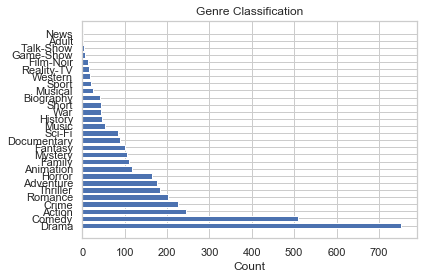

In [24]:
plt.barh(df.loc[:,"Genre"], df.loc[:,"Count"], align='center', alpha=1)
plt.xlabel('Count')
plt.title('Genre Classification')
plt.show()

In [25]:
movies_sorted.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,Score
900,tt0993846,1,The Wolf of Wall Street,\N,\N,original,\N,1,tt0993846,movie,The Wolf of Wall Street,The Wolf of Wall Street,0,2013,\N,180,"Biography,Crime,Drama",8.2,1069874.0,8772966.8
1133,tt2015381,33,Guardians of the Galaxy,\N,\N,original,\N,1,tt2015381,movie,Guardians of the Galaxy,Guardians of the Galaxy,0,2014,\N,121,"Action,Adventure,Comedy",8.0,980782.0,7846256.0
198,tt0060196,3,"Il buono, il brutto, il cattivo",\N,\N,original,\N,1,tt0060196,movie,"The Good, the Bad and the Ugly","Il buono, il brutto, il cattivo",0,1966,\N,161,Western,8.8,640941.0,5640280.8
716,tt0383574,21,Pirates of the Caribbean: Dead Man's Chest,\N,\N,original,\N,1,tt0383574,movie,Pirates of the Caribbean: Dead Man's Chest,Pirates of the Caribbean: Dead Man's Chest,0,2006,\N,151,"Action,Adventure,Fantasy",7.3,623366.0,4550571.8
461,tt0120363,31,Toy Story 2,\N,\N,original,\N,1,tt0120363,movie,Toy Story 2,Toy Story 2,0,1999,\N,92,"Adventure,Animation,Comedy",7.9,490750.0,3876925.0


In [26]:
medrating=movies_sorted["averageRating"].median()
print(medrating)

6.6


In [27]:
for label,row in movies_sorted.iterrows():
    if movies_sorted.loc[label,"averageRating"]>=medrating:
        movies_sorted.loc[label,"Recommended"]=1
    else:
        movies_sorted.loc[label,"Recommended"]=0

In [28]:
movies_sorted['Recommended'] = movies_sorted.Recommended.astype('category')
movies_sorted.head()
movies_sorted.info()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle,tconst,titleType,...,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,Score,Recommended
900,tt0993846,1,The Wolf of Wall Street,\N,\N,original,\N,1,tt0993846,movie,...,The Wolf of Wall Street,0,2013,\N,180,"Biography,Crime,Drama",8.2,1069874.0,8772966.8,1.0
1133,tt2015381,33,Guardians of the Galaxy,\N,\N,original,\N,1,tt2015381,movie,...,Guardians of the Galaxy,0,2014,\N,121,"Action,Adventure,Comedy",8.0,980782.0,7846256.0,1.0
198,tt0060196,3,"Il buono, il brutto, il cattivo",\N,\N,original,\N,1,tt0060196,movie,...,"Il buono, il brutto, il cattivo",0,1966,\N,161,Western,8.8,640941.0,5640280.8,1.0
716,tt0383574,21,Pirates of the Caribbean: Dead Man's Chest,\N,\N,original,\N,1,tt0383574,movie,...,Pirates of the Caribbean: Dead Man's Chest,0,2006,\N,151,"Action,Adventure,Fantasy",7.3,623366.0,4550571.8,1.0
461,tt0120363,31,Toy Story 2,\N,\N,original,\N,1,tt0120363,movie,...,Toy Story 2,0,1999,\N,92,"Adventure,Animation,Comedy",7.9,490750.0,3876925.0,1.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1539 entries, 900 to 1204
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   titleId          1539 non-null   object  
 1   ordering         1539 non-null   int64   
 2   title            1539 non-null   object  
 3   region           1539 non-null   object  
 4   language         1539 non-null   object  
 5   types            1539 non-null   object  
 6   attributes       1539 non-null   object  
 7   isOriginalTitle  1539 non-null   int64   
 8   tconst           1539 non-null   object  
 9   titleType        1539 non-null   object  
 10  primaryTitle     1539 non-null   object  
 11  originalTitle    1539 non-null   object  
 12  isAdult          1539 non-null   int64   
 13  startYear        1539 non-null   int64   
 14  endYear          1539 non-null   object  
 15  runtimeMinutes   1539 non-null   object  
 16  genres           1539 non-null   object 

In [29]:
column_names = genretype
dummy = pd.DataFrame(columns = column_names)
dummy.head()

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western


In [30]:
genretype

array(['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir',
       'Game-Show', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport',
       'Talk-Show', 'Thriller', 'War', 'Western'], dtype='<U11')

In [31]:
iter=0
for x in Genre:
    temp=28
    while temp!=0: 
        if  genretype[28-temp] in x:
            dummy.loc[iter,genretype[28-temp]]=1
        else:
            dummy.loc[iter,genretype[28-temp]]=0
        temp=temp-1
    iter=iter+1   

In [32]:
dummy = dummy.astype('category')
dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1539 entries, 0 to 1538
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Action       1539 non-null   category
 1   Adult        1539 non-null   category
 2   Adventure    1539 non-null   category
 3   Animation    1539 non-null   category
 4   Biography    1539 non-null   category
 5   Comedy       1539 non-null   category
 6   Crime        1539 non-null   category
 7   Documentary  1539 non-null   category
 8   Drama        1539 non-null   category
 9   Family       1539 non-null   category
 10  Fantasy      1539 non-null   category
 11  Film-Noir    1539 non-null   category
 12  Game-Show    1539 non-null   category
 13  History      1539 non-null   category
 14  Horror       1539 non-null   category
 15  Music        1539 non-null   category
 16  Musical      1539 non-null   category
 17  Mystery      1539 non-null   category
 18  News         1539 non-null  

In [33]:
movies_sorted.tail()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle,tconst,titleType,...,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,Score,Recommended
1157,tt2112307,10,Big Bad Bugs,\N,\N,original,\N,1,tt2112307,movie,...,Big Bad Bugs,0,2012,\N,95,"Action,Adventure,Comedy",2.3,273.0,627.9,0.0
800,tt0472278,1,Vampire Assassin,\N,\N,original,\N,1,tt0472278,video,...,Vampire Assassin,0,2005,\N,90,"Action,Horror",1.4,408.0,571.2,0.0
1032,tt1576703,2,Xuxa em O Mistério de Feiurinha,\N,\N,original,\N,1,tt1576703,movie,...,Xuxa em O Mistério de Feiurinha,0,2009,\N,82,Family,2.1,259.0,543.9,0.0
640,tt0291823,3,The Round and Round,\N,\N,original,\N,1,tt0291823,movie,...,The Round and Round,0,2002,\N,131,Drama,1.2,414.0,496.8,0.0
1204,tt2502186,4,Gummibär: The Yummy Gummy Search for Santa,\N,\N,original,\N,1,tt2502186,video,...,Gummibär: The Yummy Gummy Search for Santa,0,2012,\N,61,"Adventure,Animation,Comedy",1.4,268.0,375.2,0.0


In [34]:
movies_genre=movies_sorted.loc[:,["startYear","isAdult","runtimeMinutes","averageRating","numVotes","Recommended"]]
movies_genre.head()
movies_genre.info()
result = pd.concat([dummy,movies_genre.reset_index(drop=True)], axis=1)
result.tail()
result.info()

,startYear,isAdult,runtimeMinutes,averageRating,numVotes,Recommended
900,2013,0,180,8.2,1069874.0,1.0
1133,2014,0,121,8.0,980782.0,1.0
198,1966,0,161,8.8,640941.0,1.0
716,2006,0,151,7.3,623366.0,1.0
461,1999,0,92,7.9,490750.0,1.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1539 entries, 900 to 1204
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   startYear       1539 non-null   int64   
 1   isAdult         1539 non-null   int64   
 2   runtimeMinutes  1539 non-null   object  
 3   averageRating   1539 non-null   float64 
 4   numVotes        1539 non-null   float64 
 5   Recommended     1539 non-null   category
dtypes: category(1), float64(2), int64(2), object(1)
memory usage: 113.7+ KB


,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Talk-Show,Thriller,War,Western,startYear,isAdult,runtimeMinutes,averageRating,numVotes,Recommended
1534,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,2012,0,95,2.3,273.0,0.0
1535,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2005,0,90,1.4,408.0,0.0
1536,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,2009,0,82,2.1,259.0,0.0
1537,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,2002,0,131,1.2,414.0,0.0
1538,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,2012,0,61,1.4,268.0,0.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1539 entries, 0 to 1538
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Action          1539 non-null   category
 1   Adult           1539 non-null   category
 2   Adventure       1539 non-null   category
 3   Animation       1539 non-null   category
 4   Biography       1539 non-null   category
 5   Comedy          1539 non-null   category
 6   Crime           1539 non-null   category
 7   Documentary     1539 non-null   category
 8   Drama           1539 non-null   category
 9   Family          1539 non-null   category
 10  Fantasy         1539 non-null   category
 11  Film-Noir       1539 non-null   category
 12  Game-Show       1539 non-null   category
 13  History         1539 non-null   category
 14  Horror          1539 non-null   category
 15  Music           1539 non-null   category
 16  Musical         1539 non-null   category
 17  Mystery       

In [35]:
result['startYear'] = result.startYear.astype('category')
result['isAdult'] = result.isAdult.astype('category')
result['runtimeMinutes'].value_counts(dropna=False)
result=result[result.runtimeMinutes != r"\N"]
result['runtimeMinutes'] = result.runtimeMinutes.astype('int')
result['averageRating'] = result.averageRating.astype('category')
result['numVotes'] = result.numVotes.astype('int')

90     80
60     54
\N     47
100    46
95     41
       ..
356     1
53      1
47      1
177     1
152     1
Name: runtimeMinutes, Length: 178, dtype: int64

1.0    773
0.0    719
Name: Recommended, dtype: int64

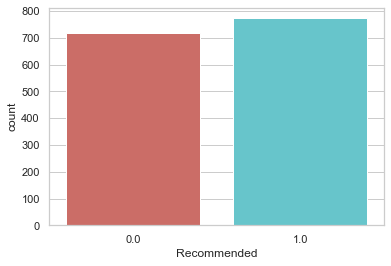

In [36]:
result['Recommended'].value_counts()
sns.countplot(x='Recommended',data=result,palette='hls')
plt.show()

# Classifier

In [37]:
#split dataset in independent and target variable
X = result.loc[:,result.columns !='Recommended'] # Independent
Y = result.loc[:,'Recommended'] # Target variable
X.info()
Y.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1492 entries, 0 to 1538
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Action          1492 non-null   category
 1   Adult           1492 non-null   category
 2   Adventure       1492 non-null   category
 3   Animation       1492 non-null   category
 4   Biography       1492 non-null   category
 5   Comedy          1492 non-null   category
 6   Crime           1492 non-null   category
 7   Documentary     1492 non-null   category
 8   Drama           1492 non-null   category
 9   Family          1492 non-null   category
 10  Fantasy         1492 non-null   category
 11  Film-Noir       1492 non-null   category
 12  Game-Show       1492 non-null   category
 13  History         1492 non-null   category
 14  Horror          1492 non-null   category
 15  Music           1492 non-null   category
 16  Musical         1492 non-null   category
 17  Mystery       

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Recommended, dtype: category
Categories (2, float64): [0.0, 1.0]

In [38]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=0)

In [40]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[282,   9],
       [  7, 299]], dtype=int64)

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

([<matplotlib.axis.XTick at 0x29429df5a48>,
 <a list of 2 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x29429e28808>,
 <a list of 2 Text yticklabel objects>)

Text(0.5, 1.1, 'Confusion matrix')

Text(30.5, 0.5, 'Actual label')

Text(0.5, 257.44, 'Predicted label')

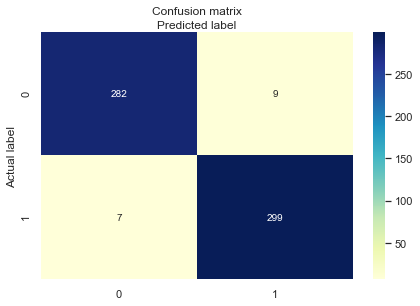

In [43]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# created heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Confusion Matrix

In [44]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9731993299832495
Precision: 0.9707792207792207
Recall: 0.9771241830065359


In [48]:
X.shape
Y.shape

(1492, 33)

(1492,)

# ROC Curve

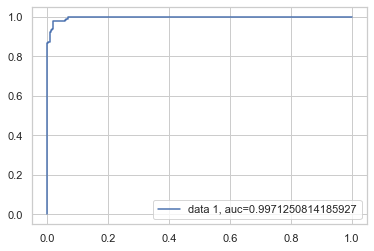

In [45]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()